In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.mixture import GMM
from sklearn.cluster import KMeans

from sklearn.datasets.samples_generator import make_blobs

## 1. 数据预处理

In [3]:
data = pd.read_csv ('data.csv', index_col='Date', parse_dates=True)
data.head(3)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0


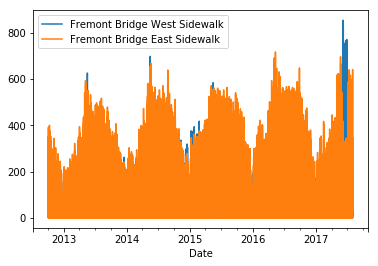

In [4]:
data.plot()

### 数据重采样，按周进行计算

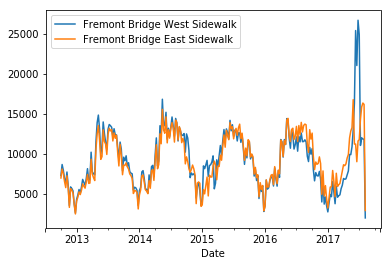

In [5]:
data.resample('w').sum().plot();

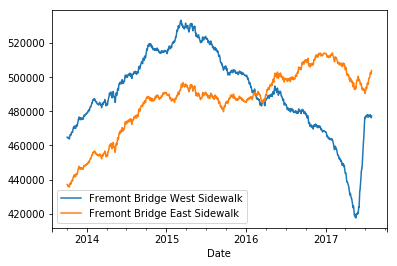

In [6]:
data.resample('D').sum().rolling(365).sum().plot()

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

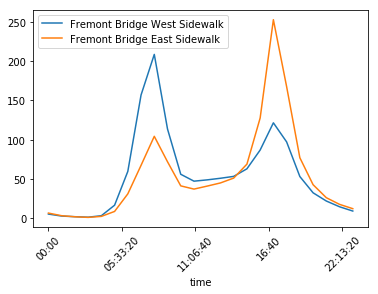

In [7]:
data.groupby(data.index.time).mean().plot();
plt.xticks(rotation=45)

In [8]:
data.columns =['West', 'East']
data ['Total'] =data['West'] + data['East']

pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
print(pivoted.shape)
pivoted.iloc[:5,:5]

(24, 1763)


,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

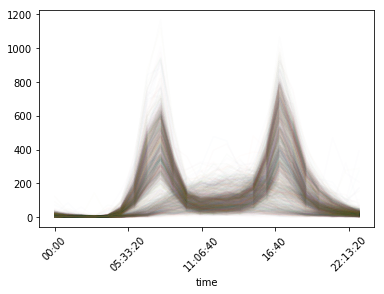

In [9]:
pivoted.plot(legend=False, alpha=0.01);
plt.xticks(rotation=45)

In [10]:
X = pivoted.fillna(0).T.values
X.shape

(1763, 24)

### PCA降维简单可视化数据

In [11]:
X2 = PCA(2).fit_transform(X)
X2.shape

(1763, 2)

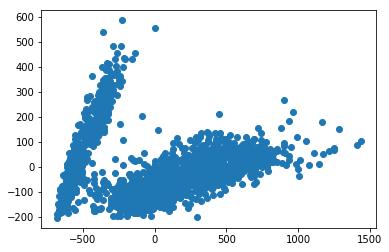

In [12]:
plt.scatter(X2[:, 0], X2[:, 1])

## 2. GMM

In [13]:
gmm = GMM(2)
gmm.fit(X)

labels = gmm.predict_proba(X)
labels

array([[1.50917529e-12, 1.00000000e+00],
       [1.05537957e-12, 1.00000000e+00],
       [1.12468973e-05, 9.99988753e-01],
       ...,
       [1.00000000e+00, 5.73079863e-18],
       [1.00000000e+00, 1.35824323e-19],
       [1.38271780e-41, 1.00000000e+00]])

In [14]:
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

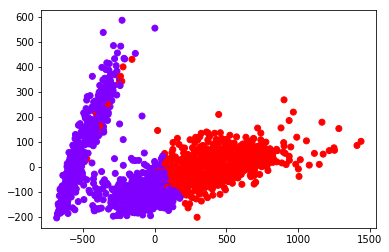

In [15]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow') 

Text(0.5, 1.0, 'Red Cluster')

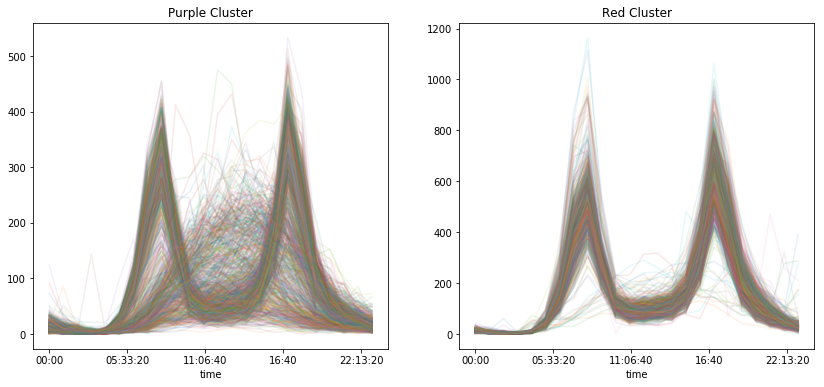

In [16]:
fig, ax = plt.subplots(1, 2, figsize =(14, 6))
                      
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title ('Purple Cluster')
ax[1].set_title ('Red Cluster')

## 3. GMM vs. K-means

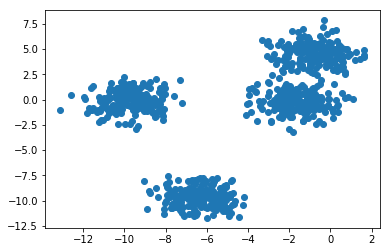

In [17]:
X, y_true = make_blobs(n_samples=800, centers=4, random_state=11)
plt.scatter(X[:, 0], X[:, 1])

### K-means

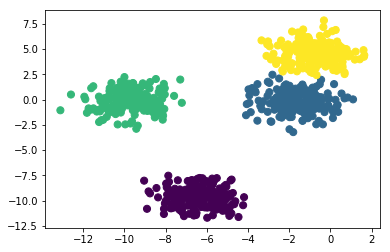

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

### GMM

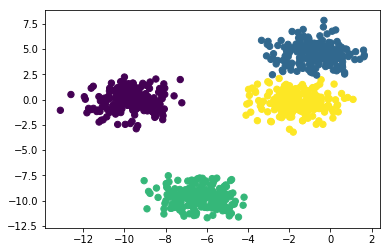

In [19]:
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### 提升数据的复杂性

In [20]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

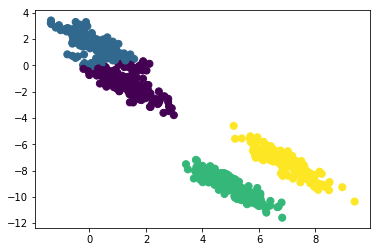

In [21]:
# kmeans

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_stretched)
y_kmeans = kmeans.predict(X_stretched)

plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

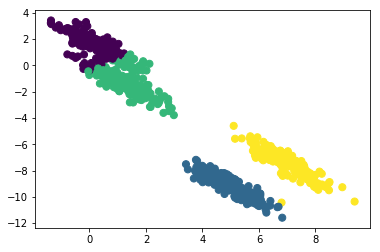

In [22]:
# GMM

gmm = GMM(n_components=4)        
gmm.fit(X_stretched)
y_gmm = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_gmm, s=50, cmap='viridis')